In [1]:
from tensorflow import keras  # Import the Keras API from TensorFlow to build and train models
from tensorflow.keras import layers  # Import the layers module to create the layers of the neural network
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations and to handle arrays

In [2]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10.0], dtype=float)  # Define the feature array (number of bedrooms) as a NumPy array of floats
y = np.array([100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 550.0], dtype=float)  # Define the target array (house prices in $'000) as a NumPy array of floats

In [3]:
# Define the model using the Sequential API, which allows for creating models layer-by-layer
model = keras.Sequential([
    # Dense layer as the first layer with 1 neuron. Used linear activation.  Gotten from Book
    # Input Shape - gives me the shape of the input data.
    # We are predicting house price from one feature (number of bedrooms), so input_shape is [1].
    # Only using one layer
    keras.layers.Dense(units=1, activation='linear', input_shape=[1]),
])

In [5]:
# Specifying the optimizer and loss function, then compile function
# The optimizer updates the model's weights during training, and the loss function measures how well the model is performing.
# Stochastic Gradient Descent (SGD) as the optimizer. From Book
# MSE for loss function
# TRIED SEVERAL EPOCHS 1000, 100, 10   PRETTY MUCH ALL THE SAME
model.compile(optimizer='sgd', loss='mean_squared_error')

In [10]:
# Train the model using the `fit` method. This method adjusts the model parameters to minimize the loss.

# PERSONAL NOTES FOR WHAT EVERYTHING DOES
# x is the input features (number of bedrooms), and y is the target values (house prices).
# epochs specifies how many times the model will go through the entire dataset.
# verbose controls the detail of output during training (1 for progress bar, 0 for no output).
# history will store the training loss values for each epoch, allowing us to visualize the training process later.
history = model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0079
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0077
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0075
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0071
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 13/100
1/1 [==============================] 

In [11]:
# Convert to a pandas DataFrame.
df = pd.DataFrame(history.history)
# Display the first few rows of the dataframe to check the loss values.
df.head()

,loss
0,0.007888
1,0.007802
2,0.007718
3,0.007632
4,0.007548


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

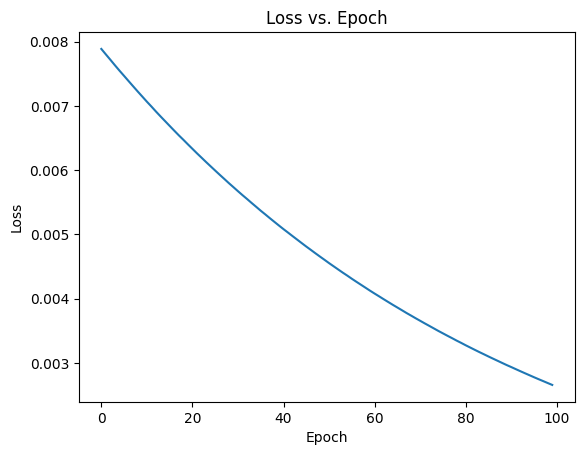

In [12]:
# Pandas built-in plotting function to create a plot of loss vs. epoch.
# This visualizes loss changes with each epoch, is the model is learning effectively?
loss_plot = df.plot(y="loss", title="Loss vs. Epoch", legend=False)
# Set the labels for the x-axis and y-axis.
loss_plot.set(xlabel="Epoch", ylabel="Loss")

In [13]:
# Use the `predict` method of the model to predict the house price for a house with 7 bedrooms.
# The input to `predict` should be a numpy array or a list of inputs.
predicted_price = model.predict([7.0])
# Print the predicted price. The output will be in the same scale as the training data (thousands of dollars).
print("Predicted price for a house with 7 bedrooms: $", predicted_price[0][0], "k")

1/1 [==============================] - 0s 41ms/step
Predicted price for a house with 7 bedrooms: $ 400.01428 k
